In [16]:
# Missing Data

# train.isnull().sum()
# missing_data = train.isnull().sum() * 100 / len(train)
# sns.set (rc = {'figure.figsize':(15, 5)})
# sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)


# Distribution of a target variable

# ax = sns.countplot(data=train, x='Survived')
# ax.bar_label(ax.containers[0])

# Imputations

# Filling missing values by mean in each group
# train['age2'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [91]:
train = pd.read_csv('titanic_train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train.shape

(891, 12)

In [4]:
# use seaborn to see where we are missing data

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
missing_data = train.isnull().sum() * 100 / len(train)
missing_data

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

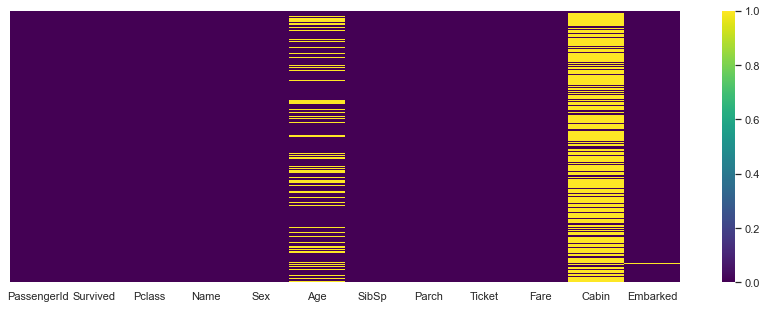

In [13]:
sns.set (rc = {'figure.figsize':(15, 5)})
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)

In [ ]:
# Get the ratio of a target label: who survived who didn't

[Text(0, 0, '549'), Text(0, 0, '342')]

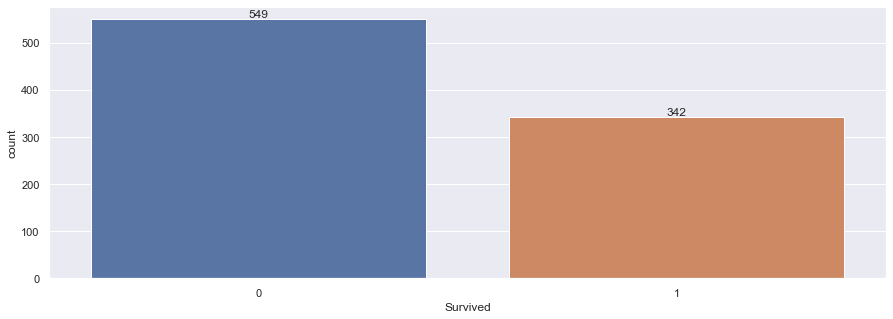

In [19]:
ax = sns.countplot(data=train, x='Survived')
ax.bar_label(ax.containers[0])

[Text(0, 0, '81'), Text(0, 0, '233')]

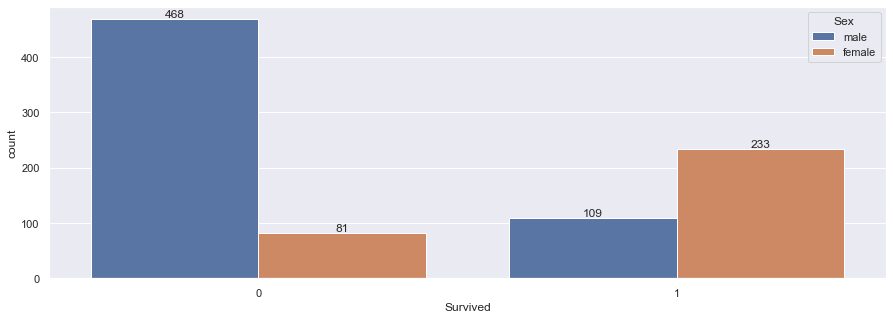

In [22]:
ax = sns.countplot(data=train, x='Survived', hue='Sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

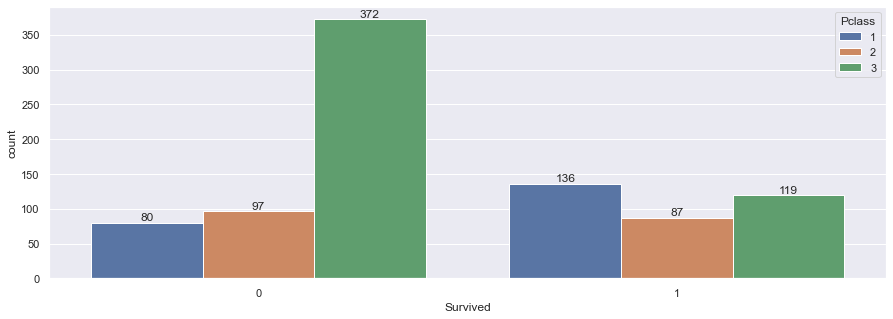

In [29]:
ax = sns.countplot(data=train, x='Survived', hue='Pclass')

for c in ax.containers:
    ax.bar_label(c,)

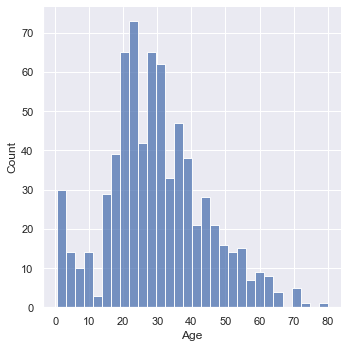

In [32]:
ax = sns.displot(train['Age'].dropna(), bins=30)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


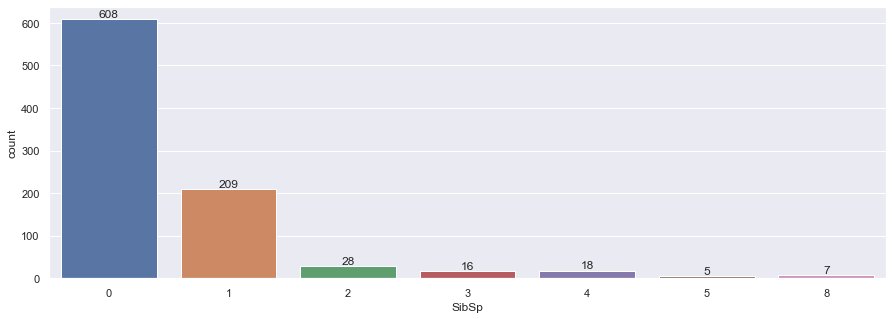

In [36]:
ax = sns.countplot(data=train, x='SibSp')

for c in ax.containers:
    ax.bar_label(c,)
    
# a lot of single people

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='Fare'>

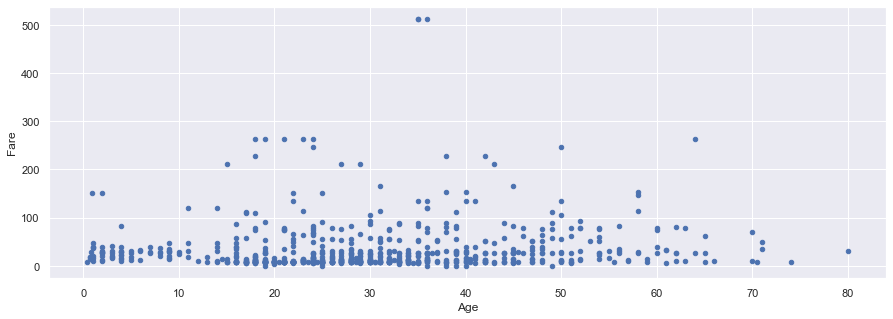

In [42]:
train.plot(kind='scatter', x='Age', y='Fare')

<AxesSubplot:>

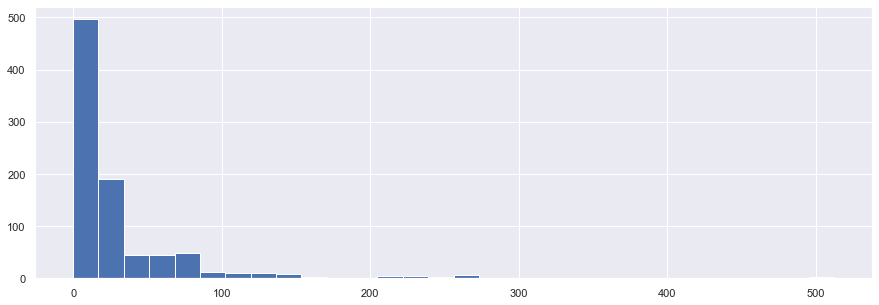

In [44]:
train['Fare'].hist(bins=30)

In [45]:
train[train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


# Part 2

In [47]:
# Cleaning Data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

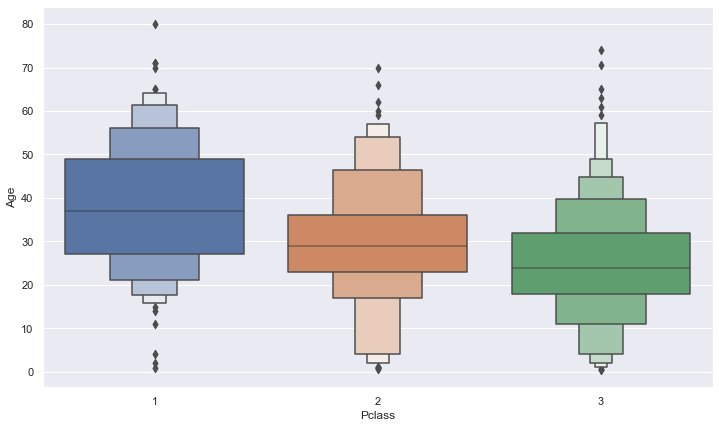

In [49]:
plt.figure(figsize=(12,7))
sns.boxenplot(data=train, x='Pclass', y='Age')

# Passengers in the 1st class tend to be older than the passengers in the lower classes

In [53]:
age = train.groupby('Pclass')['Age'].mean()
age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [93]:
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [94]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [95]:
train['Age'] = train['Age'].astype('int')

In [96]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


<AxesSubplot:>

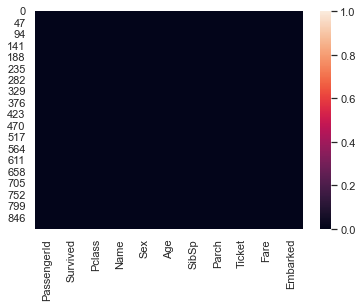

In [98]:
sns.heatmap(train.isnull())

In [97]:
train.drop(columns='Cabin', inplace=True)

In [99]:
train.dropna(inplace=True)

In [100]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Categorical Features (dummy variable) converting categorical variables

In [101]:
# Example: replacing male/female to 1/0

In [102]:
pd.get_dummies(train['Sex'])

# this will create two columns causing multicollinearity. 
# The model will see 0 in female column which will indicate that male is 1. 
# female column will be a perfect predictor of male column

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [103]:
# To fix the above use drop_first=True

pd.get_dummies(train['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [104]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [107]:
pd.get_dummies(train['Embarked'])

# We have to drop one of the columns, so that they are nor perfect predictors of each other

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [108]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [109]:
# Add new columns to train df

train = pd.concat([train,sex,embark], axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,0,1


In [110]:
train.drop(columns=['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True)

In [111]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1


In [112]:
train.drop(columns=['PassengerId'], inplace=True)

In [113]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


# Part 3

In [114]:
# Train the model and predict

In [115]:
X = train.drop(columns=['Survived'])
y = train['Survived']   # 0 or 1

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logmodel = LogisticRegression()

In [120]:
# train the model

In [121]:
logmodel.fit(X_train, y_train)

C:\Users\go27s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [122]:
predictions = logmodel.predict(X_test)

# Evaluate the model

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)